# Objective of the Analysis
---------

We will use Panda, Numpy and Seaborn to analyse data, find correlations or at least connections between a Happiness "subjective feeling" and more quantitative data like :
- Economy
- Family
- Health
- Freedom
- Generosity
- Corruption
- Dystopia
- Job Satisfaction

I will comment on this analysis at each step and give some hypothesis, insights of what we can see or what we can deepen later on.

# A. Importing, cleaning and numerical summaries
-------------------

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df[0:3] #display a portion of dataset to check if properly loaded

Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0     Malta              27            6.527  1.343280  1.488412  0.821944   
1  Zimbabwe             138            3.875  0.375847  1.083096  0.196764   
2    Cyprus              65            5.621  1.355938  1.131363  0.844715   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.588767    0.574731    0.153066  1.556863              85.2   
1  0.336384    0.189143    0.095375  1.597970              56.3   
2  0.355112    0.271254    0.041238  1.621249              88.7   

           Region  
0  Western Europe  
1          Africa  
2  Eastern Europe

In [3]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


### What can we say ?
We can see that, 10 are numerical data. 9 out of 12  are floats + 1 is integer (obviously the ranking). 
Those columns can be used with the "describe" function to have a better idea of the dataset, with mean, minimum and maximum value for all those.

Region and Country are logically "objects", more specifically strings

In [5]:
df.describe()

Happiness Rank  Happiness Score     Economy      Family      Health  \
count      153.000000       153.000000  153.000000  153.000000  153.000000   
mean        78.169935         5.349281    0.982433    1.186630    0.550117   
std         45.008741         1.134997    0.421901    0.288441    0.237769   
min          1.000000         2.693000    0.000000    0.000000    0.000000   
25%         40.000000         4.497000    0.659517    1.041990    0.364509   
50%         78.000000         5.279000    1.064578    1.251826    0.606042   
75%        117.000000         6.098000    1.315175    1.416404    0.719217   
max        155.000000         7.537000    1.870766    1.610574    0.949492   

          Freedom  Generosity  Corruption    Dystopia  Job Satisfaction  
count  153.000000  153.000000  153.000000  153.000000        151.000000  
mean     0.408489    0.245324    0.123179    1.853072         75.209934  
std      0.150744    0.134395    0.102133    0.499490         12.962365  
min      0.000000    0.000000    0.000000    0.377914         44.400000  
25%      0.300741    0.153075    0.057070    1.597970         68.950000  
50%      0.437454    0.231503    0.089848    1.832910         78.100000  
75%      0.518631    0.322228    0.153066    2.150801         85.100000  
max      0.658249    0.838075    0.464308    3.117485         95.100000

### First look at the data :

It seems to have 153 lines for most of data except Job Satisfaction (possibly missing 2)

We can also notice that the max Happiness Rank is 155, which should not be possible with "only" 153 countries in the dataset. We will check this.


In [6]:
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

Indeed we have two missing data in "Job Satisfaction" Column. 
Let's check those two missing "lines"

In [7]:
df[df['Job Satisfaction'].isnull()]

Country  Happiness Rank  Happiness Score   Economy    Family  \
43  North Cyprus              61            5.810  1.346911  1.186303   
61   South Sudan             147            3.591  0.397249  0.601323   

      Health   Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
43  0.834647  0.471204    0.266846    0.155353  1.549158               NaN   
61  0.163486  0.147062    0.285671    0.116794  1.879567               NaN   

            Region  
43  Eastern Europe  
61          Africa

**The rest of the columns for these two countries are ok, no need to drop these yet beacuse of the missing Job Satisfaction**

With this kind of dataset, it could be a good idea to use the ranking, which is an integer as our new index.

In [8]:
df.set_index('Happiness Rank', inplace=True)


In [9]:
df_sorted = df.sort_index(axis=0, ascending=True)  # sorting the dataset df into df_sorted by index Happiness Ranking

## 10 Happiest Countries 

In [10]:
df_sorted[0:10]

Country  Happiness Score   Economy    Family    Health  \
Happiness Rank                                                               
1                    Norway            7.537  1.616463  1.533524  0.796667   
2                   Denmark            7.522  1.482383  1.551122  0.792566   
3                   Iceland            7.504  1.480633  1.610574  0.833552   
4               Switzerland            7.494  1.564980  1.516912  0.858131   
5                   Finland            7.469  1.443572  1.540247  0.809158   
6               Netherlands            7.377  1.503945  1.428939  0.810696   
7                    Canada            7.316  1.479204  1.481349  0.834558   
8               New Zealand            7.314  1.405706  1.548195  0.816760   
9                    Sweden            7.284  1.494387  1.478162  0.830875   
10                Australia            7.284  1.484415  1.510042  0.843887   

                 Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
Happiness Rank                                                                 
1               0.635423    0.362012    0.315964  2.277027              94.6   
2               0.626007    0.355280    0.400770  2.313707              93.5   
3               0.627163    0.475540    0.153527  2.322715              94.5   
4               0.620071    0.290549    0.367007  2.276716              93.7   
5               0.617951    0.245483    0.382612  2.430182              91.2   
6               0.585384    0.470490    0.282662  2.294804              93.8   
7               0.611101    0.435540    0.287372  2.187264              90.5   
8               0.614062    0.500005    0.382817  2.046456              88.6   
9               0.612924    0.385399    0.384399  2.097538              92.7   
10              0.601607    0.477699    0.301184  2.065211              89.2   

                        Region  
Happiness Rank                  
1               Western Europe  
2               Western Europe  
3               Western Europe  
4               Western Europe  
5               Western Europe  
6               Western Europe  
7                North America  
8                 Asia-Pacific  
9               Western Europe  
10                Asia-Pacific

**Good choice to be in Switzerland !!**

However, instead of the rank index I used, we can more properly use the Happiness Score as stated in the Tasks : 

In [11]:
df_happy = df.sort_values('Happiness Score' , ascending = False)[0:10]
df_happy['Country']

Happiness Rank
1          Norway
2         Denmark
3         Iceland
4     Switzerland
5         Finland
6     Netherlands
7          Canada
8     New Zealand
10      Australia
9          Sweden
Name: Country, dtype: object

## 10 Least africa Countries 

Same as above, insted of using Indexes

In [12]:
df_unhappy = df.sort_values('Happiness Score' , ascending = True)[0:10]
df_unhappy['Country']

Happiness Rank
155    Central African Republic
154                     Burundi
153                    Tanzania
152                       Syria
151                      Rwanda
150                        Togo
149                      Guinea
148                     Liberia
147                 South Sudan
146                       Yemen
Name: Country, dtype: object

# B. Indexing and Grouping
-----------------------------

Let's group the data by region from the original dataframe, and save them distinctly

In [13]:
df_western_europe = df.loc[df.Region == 'Western Europe'].copy()  # using .loc to use the column name as a boolean
df_western_europe[1:4] # let's check the data


Country  Happiness Score   Economy    Family    Health  \
Happiness Rank                                                                  
9                       Sweden            7.284  1.494387  1.478162  0.830875   
17                     Belgium            6.891  1.463781  1.462313  0.818092   
23              Czech Republic            6.609  1.352682  1.433885  0.754444   

                 Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
Happiness Rank                                                                 
9               0.612924    0.385399    0.384399  2.097538              92.7   
17              0.539771    0.231503    0.251343  2.124210              91.1   
23              0.490946    0.088107    0.036873  2.451862              79.8   

                        Region  
Happiness Rank                  
9               Western Europe  
17              Western Europe  
23              Western Europe

In [14]:
df_western_europe.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness western europe.csv', header=True)

I will use a list comprehension to make a function to save the files :

In [15]:
def save_csv_from_df(dataframe, column_name):
    
    list_value=[x for x in column_name]  # make a list of all value in a column
    list_value = list(set(list_value)) # make a DISTINCT list from the first
    
    for x in list_value:
        dfx = dataframe
        dfx = dataframe.loc[column_name == x].copy  # for each region create a copy dataframe     
        #dfx.to_csv (r'C:\Users\Utilisateur\EPFL Course\Europe.csv', header=True)
        
        # did not succeed to include a "string" variable in the URL, even trying multiple techniques : %s

        
        
# save_csv_from_df(df, df.Region) ==> call the function

### Unfortunately I did not succeed to use a function to loop the grouping and saving as CSV. So I will continue manually, and come back to it later. while asking the question.

I will do it manually then : **First, let's vérify the regions to save as csv** 

In [16]:
list_region = list(set(df_sorted.Region))   # check distinct regions to not miss one manually
list_region

['Africa',
 'Eastern Europe',
 'North America',
 'Latin America',
 'Western Europe',
 'Asia-Pacific',
 'Europe']

##### I noticed during analysis that 'Ukraine' is the only country in "Europe" region. It would be more convenient to group it into "Eastern Europe" region.
(even though since 2013, and Crimea Crisis, Ukraine tend to get closer to the US and Western Europe "geopolitically" but that is another subject..

**I will suppose that region is mainly based on geographics.**

Nonetheless, in a sociology analysis like this one, it could be interesting to add other layers of "lecture", but I will develop in conclusion (democracy vs dictature, cultural influence, ongoing /recent wars, blocades, economical type, city population vs rural population, religion, liberal vs socialist ...) to find more links or biases.

In [17]:
df_sorted['Region'] = df_sorted['Region'].replace('Europe', 'Eastern Europe')  # modifying Europe by Eastern Europe
df_sorted.loc[df.Country == 'Ukraine']['Region']

Happiness Rank
132    Eastern Europe
Name: Region, dtype: object

**We can see that Ukraine has been properly reallocated to Eastern Europe inside df_sorted**

In [18]:
list_region = list(set(df_sorted.Region))   # check distinct regions to not miss one manually
list_region

['Africa',
 'Eastern Europe',
 'North America',
 'Latin America',
 'Western Europe',
 'Asia-Pacific']

### We now have 6 remaining regions instead of 7

In [19]:
df_apac = df.loc[df.Region == 'Asia-Pacific'].copy()
df_north_america = df.loc[df.Region == 'North America'].copy()
df_africa = df.loc[df.Region == 'Africa'].copy()
df_eastern_europe = df.loc[df.Region == 'Eastern Europe'].copy()
df_latam = df.loc[df.Region == 'Latin America'].copy()

# western europe already done as test

**All regionals dataframes are created, now we convert them into a csv**

In [20]:
df_apac.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness asia pacific.csv', header=True)
df_north_america.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness north america.csv', header=True)
df_africa.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness africa.csv', header=True)
df_eastern_europe.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness eastern europe.csv', header=True)
df_latam.to_csv (r'C:\Users\Utilisateur\EPFL Course\happiness latin america.csv', header=True)

### All files are created.

#### Mean Happiness Score for each region

In [21]:
df_western_europe['Happiness Score'].mean()              # testing method  .mean()

6.880473714157894

It would be cleaner to build a new dataframe

In [22]:
df_region_mean = df_sorted.groupby('Region')['Happiness Score'].mean().to_frame().sort_values('Happiness Score', ascending = False)

In [23]:
df_region_mean

Happiness Score
Region                         
North America          7.154500
Western Europe         6.880474
Latin America          5.957818
Eastern Europe         5.451478
Asia-Pacific           5.358326
Africa                 4.239500

We can verify that we obtain the same value for western europe as the test above

#### Number of countries in each region that have a happiness score above 6.0

We will use the same original dataframe

In [24]:
df_happy_countries = df_sorted[df_sorted['Happiness Score']>6.0].sort_values('Happiness Score', ascending = False)
df_happy_countries [-5:]

Country  Happiness Score   Economy    Family    Health  \
Happiness Rank                                                               
41                  Bahrain            6.087  1.488412  1.323110  0.653133   
42                 Malaysia            6.084  1.291215  1.284646  0.618784   
43                Nicaragua            6.071  0.737299  1.287216  0.653096   
44                  Ecuador            6.008  1.000820  1.286169  0.685636   
45              El Salvador            6.003  0.909784  1.182125  0.596019   

                 Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
Happiness Rank                                                                 
41              0.536747    0.172668    0.257042  1.656149              79.9   
42              0.402265    0.416609    0.065601  2.004449              85.0   
43              0.447552    0.301674    0.130688  2.513931              82.3   
44              0.455198    0.150112    0.140135  2.290353              83.0   
45              0.432453    0.078258    0.089981  2.714594              80.9   

                       Region  
Happiness Rank                 
41               Asia-Pacific  
42               Asia-Pacific  
43              Latin America  
44              Latin America  
45              Latin America

We can check, we indeed have a dataframe with the last Country beeing "El Salvador" (ranked 45th) with 6.003 as Happiness Score
With this new dataframe let's count how many countries per region

In [25]:
count_happy = df_happy_countries.groupby('Region')['Country'].count();
count_happy

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Country, dtype: int64

This result is interesting but needs to be explained cautiously, indeed, we could notice that North America is the first ranked BUT only represents 2 countries and a population of about 360 millions, while Asia-Pacific (43 countries in the dataset) include China and India with more than 3 billions..

Indeed, during the exercise we used the "mean" of a non cumulative calculation to measure the results of a region, but we include an obvious mathematical bias  which is for example in this case, the population :
China's "Happiness Score" should have in theory 160 times more "weight" in the average of Asia Pacific than Israel.
The global "region" mapping might be too vague in this analysis and includes too many different countries which are all mixed up together.

That's where it could be interesting to analyze each region statistically, for example, the span between min and max as asked.

It is obviously more interesting to do this span analysis on the whole dataset and not only the countries with a score > 6.0. 

In [26]:
df_sorted.groupby('Region')['Happiness Score'].describe()  # describe happiness score for each region into a dataframe

count      mean       std    min      25%     50%      75%  \
Region                                                                       
Africa           44.0  4.239500  0.681866  2.693  3.78775  4.1850  4.60425   
Asia-Pacific     43.0  5.358326  0.955062  3.462  4.65000  5.2690  6.02750   
Eastern Europe   23.0  5.451478  0.488309  4.096  5.23200  5.5690  5.83150   
Latin America    22.0  5.957818  0.750925  3.603  5.54850  6.0395  6.45400   
North America     2.0  7.154500  0.228395  6.993  7.07375  7.1545  7.23525   
Western Europe   19.0  6.880474  0.611070  5.195  6.56800  6.9510  7.42300   

                  max  
Region                 
Africa          5.872  
Asia-Pacific    7.314  
Eastern Europe  6.098  
Latin America   7.079  
North America   7.316  
Western Europe  7.537

In [27]:
df_span_region = df_sorted.groupby('Region')['Happiness Score'].agg(lambda x : max(x)-min(x)).to_frame().sort_values('Happiness Score',ascending = False)
df_span_region

Happiness Score
Region                         
Asia-Pacific              3.852
Latin America             3.476
Africa                    3.179
Western Europe            2.342
Eastern Europe            2.002
North America             0.323

Logically, as I said earlier, the multiplicity and diversity of the Asia Pacific 40-ish countries is also show here, as it has the largest range of values within its datapoints.

# C. Bar plot of the Happiness Score
-------------------------------------

In [28]:
import matplotlib.pyplot as plt


In [29]:
%matplotlib inline


In [30]:
# we can use, the former dataframe we computed called df_happy with the 10 happiest countries
df_happy = df_happy.sort_values('Happiness Score')
plot = plt.barh(df_happy["Country"], df_happy["Happiness Score"]);
plt.xlim(0,8)
plt.xticks([0,1,2,3,4,5,6,7,8]);
plt.ylabel('Countries')
plt.xlabel('Happiness Score');
plt.title('Happiness Score for the TOP10 Countries')
# plt.grid(color = 'gray')
plt.show()


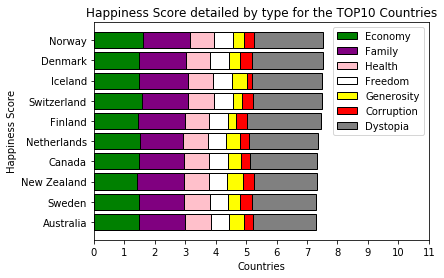

In [31]:
# based on the barh documentation and barh plot we have already done for medals

plt.barh(df_happy["Country"], df_happy["Economy"], color='green', edgecolor='black', label = "Economy")
plt.barh(df_happy["Country"], df_happy["Family"], color='purple', edgecolor='black', label = "Family", left = df_happy["Economy"])
plt.barh(df_happy["Country"], df_happy["Health"], color='pink', edgecolor='black', label = "Health", left = df_happy["Economy"]+df_happy["Family"])
plt.barh(df_happy["Country"], df_happy["Freedom"], color='white', edgecolor='black', label = "Freedom", left = df_happy["Economy"]+df_happy["Health"]+df_happy["Family"])
plt.barh(df_happy["Country"], df_happy["Generosity"], color='yellow', edgecolor='black', label = "Generosity", left = df_happy["Economy"]+df_happy["Health"]+df_happy["Family"]+df_happy["Freedom"])
plt.barh(df_happy["Country"], df_happy["Corruption"], color='red', edgecolor='black', label = "Corruption", left = df_happy["Economy"]+df_happy["Health"]+df_happy["Family"]+df_happy["Freedom"]+df_happy["Generosity"])
plt.barh(df_happy["Country"], df_happy["Dystopia"], color='grey', edgecolor='black', label = "Dystopia", left = df_happy["Economy"]+df_happy["Health"]+df_happy["Family"]+df_happy["Freedom"]+df_happy["Generosity"]+df_happy["Corruption"])


plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11]); # to ease the reading of the legend I chose to add 3 more xticks 
plt.ylabel("Happiness Score");
plt.xlabel("Countries");
plt.title("Happiness Score detailed by type for the TOP10 Countries");
plt.legend(loc="upper right")

It seeems obvious that "dystopia" has a huge impact on this global ranking (indeed, in average it represents a third of the global Score : 283 pts out of 818 total score all countries mixed)

we already have a database for Africa : df_africa

In [32]:
df_africa = df_africa.sort_values('Happiness Score')
plt.figure(figsize=(10 , 35))   #  make the plot height bigger with a lot of Countr to display
plt.barh(df_africa["Country"], df_africa["Economy"], color='green', edgecolor='black', label = "Economy")
plt.barh(df_africa["Country"], df_africa["Family"], color='purple', edgecolor='black', label = "Family", left = df_africa["Economy"])
plt.barh(df_africa["Country"], df_africa["Health"], color='pink', edgecolor='black', label = "Health", left = df_africa["Economy"]+df_africa["Family"])
plt.barh(df_africa["Country"], df_africa["Freedom"], color='white', edgecolor='black', label = "Freedom", left = df_africa["Economy"]+df_africa["Health"]+df_africa["Family"])
plt.barh(df_africa["Country"], df_africa["Generosity"], color='yellow', edgecolor='black', label = "Generosity", left = df_africa["Economy"]+df_africa["Health"]+df_africa["Family"]+df_africa["Freedom"])
plt.barh(df_africa["Country"], df_africa["Corruption"], color='red', edgecolor='black', label = "Corruption", left = df_africa["Economy"]+df_africa["Health"]+df_africa["Family"]+df_africa["Freedom"]+df_africa["Generosity"])
plt.barh(df_africa["Country"], df_africa["Dystopia"], color='grey', edgecolor='black', label = "Dystopia", left = df_africa["Economy"]+df_africa["Health"]+df_africa["Family"]+df_africa["Freedom"]+df_africa["Generosity"]+df_africa["Corruption"])


plt.xticks([0,1,2,3,4,5,6,7,8,9]); # to ease the reading of the legend I chose to add 3 more xticks 
plt.ylabel("Happiness Score");
plt.xlabel("Countries");

plt.title("Happiness Score detailed by type for African Countries");
plt.legend(loc="upper right");


I notice on this graph, that Dystopia may have very low value and impact greatly the ranking of a country. 
Here, Botswana without Dystopia would be TOP 3 probably. (Rwanda & Tanzania are similar - this was not visible with "Happiest Countries")

Considering Dystopia is a calculation based on the 6 key variables versus their lowest former value in an older analysis, I am a bit concerned that it may add a redundant factor which could bias the analysis (but I am not sure how yet, and shoud investigate)
I have checked this link : 
https://s3.amazonaws.com/happiness-report/2017/HR17-Ch2.pdf

Then I moved to the 2020 World Happiness Report, and it seems that they chose to keep only the 6 first factors. I have not found a reason in their report why they took it off.

# D. Histogram of Job Satisfaction
----------------------------------

In order to group the Satisfaction in categories, we could add a column in the dataframe (or groupby) and include a loop to "read and classify" each country then use a bar plot (because each category span is 10%, which makes sense)

But as asked we will use a Histogram :




In [33]:
plt.hist(df_sorted['Job Satisfaction']);

C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


The default histogram here has a 5% categories however we want them grouped by custom categories

(We also remember that we have to missing countries NaN on Job Satisfaction, but it does not put this analysis at risk of misconclusion so I chose to keep them)

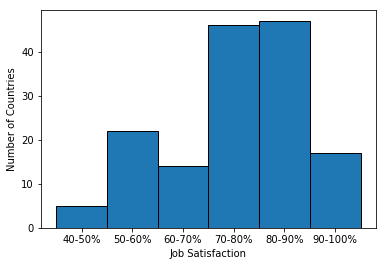

In [34]:
categories = ['40-50%','50-60%','60-70%','70-80%','80-90%','90-100%']
ticks = [45,55,65,75,85,95] # i put the xticks on the middle of each category
bin_size = [40,50,60,70,80,90,100] # force the number of bins, could have said bins = 6

plt.hist(df_sorted['Job Satisfaction'],bins = bin_size,edgecolor = 'black');   # create the plot
plt.xticks(ticks,categories);     
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Countries');



To go further, instead of using the number of countries, (as said earlier) I would use the weight of each country based on its population (using the "weights" in plt.hist(weights(array_like))

Remarque : With a category-type barplot, we could have added a color per region with a cumulative bar plot to notice the regional differences in Job Satisfaction as well. Which does not seem possible with a Histogram.

However I found another interesting method so "groupby" or "split by" in this case

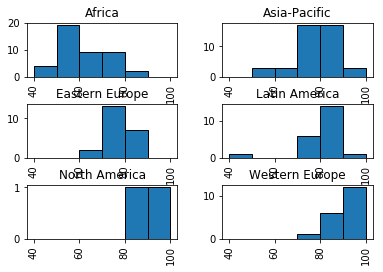

In [35]:
df_sorted['Job Satisfaction'].hist(by = df_sorted['Region'], bins = bin_size,edgecolor = 'black');
plt.figure.figsize =[25,10]

**We notice, that Western Europe and North America, (as we could have expected, based on the first observations) are also the "best" in terms of Job Satisfaction.**

# E. Pairwise Scatter plots
-----------------------------

For this kind of graphs, I will use Seaborn

In [36]:
import seaborn as sns

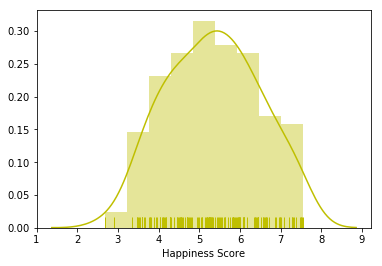

In [37]:
sns.distplot(df_sorted['Happiness Score'], vertical = False, hist = True, kde = True, color = 'y', rug = True);
# let's check first a distribution of the Happiness Score
# https://seaborn.pydata.org/generated/seaborn.distplot.html

Looks like a beautiful "almost" Normal distribution with this **.distplot()** method

### Scatter plots

In [38]:
sns.pairplot(df_sorted, x_vars = ('Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia', 'Job Satisfaction'), y_vars = 'Happiness Score', kind = 'reg');

# F. Correlation
-----------------

Visually, from above scatter plots, I would say, Economy, Family, Job Satisfaction and Health should be the more correlated to Happiness Score here. But let's verify with the R value, that's what we usually check. 

##### I checked on internet and found the **corr()** method returning a new dataframe with all numerical columns compare, it seems to be a good start. 

**The closer to one, the better correlated**


In [39]:
correlations =df_sorted.corr()
correlations

Happiness Score   Economy    Family    Health   Freedom  \
Happiness Score          1.000000  0.811194  0.753815  0.780496  0.576027   
Economy                  0.811194  1.000000  0.688701  0.841900  0.375043   
Family                   0.753815  0.688701  1.000000  0.612003  0.425937   
Health                   0.780496  0.841900  0.612003  1.000000  0.354683   
Freedom                  0.576027  0.375043  0.425937  0.354683  1.000000   
Generosity               0.160010 -0.017310  0.046005  0.065979  0.312880   
Corruption               0.435854  0.357817  0.233749  0.285952  0.497729   
Dystopia                 0.474300  0.018464  0.073697  0.049716  0.089590   
Job Satisfaction         0.812873  0.700662  0.623266  0.704795  0.500655   

                  Generosity  Corruption  Dystopia  Job Satisfaction  
Happiness Score     0.160010    0.435854  0.474300          0.812873  
Economy            -0.017310    0.357817  0.018464          0.700662  
Family              0.046005    0.233749  0.073697          0.623266  
Health              0.065979    0.285952  0.049716          0.704795  
Freedom             0.312880    0.497729  0.089590          0.500655  
Generosity          1.000000    0.292364 -0.103064          0.220032  
Corruption          0.292364    1.000000 -0.016260          0.337131  
Dystopia           -0.103064   -0.016260  1.000000          0.281655  
Job Satisfaction    0.220032    0.337131  0.281655          1.000000

In [40]:
correlations_happiness_score = correlations['Happiness Score'].sort_values()   # new dataframe with "Happiness Score" column only
plt.barh(correlations_happiness_score.index, correlations_happiness_score); # plot as a horizontal bar chart with index as categories
plt.xlabel("R-Value");

### We can conclude on this plot :
#### Happiness Score is completely correlated to ... Happiness Score.. makes sense ! Our correlation works.

#### Job Satisfaction (R = 0.813 if considered a variable here), otherwise Economy (R = 0.811), are the most correlated to Happiness Score. Maybe these 2 variables are linked together (I will check this after)

##### However, I would like to precise that we should never confuse "correlation" and "causality".. it's often a mistake we can see in the media, analysis, history, medicine even science. 

In this case we can only say that Economy and Happiness are linked somehow.. but there could be a common other variable implying those two. 

Possibly a good Economy implies a good Happiness Level,
Or a good Happiness Level, makes you work better, and improves Economy..
OR... a brand new other factor we could have forgotten to ask or check ..

In this case, a good economy, probably implies better job satisfaction and then people feel better.. but we can not be sure of the Causality, not this way at least.  It would need a double-blind experiment..not the topic here though.

#### But anyway, R (~0.8) is fairly strong but not absolutely correlated.

On the contrary, Generosity seems to have no correlations to Happiness Score as calculated here..



In [41]:
correlations_economy_score = correlations['Economy'].sort_values()   # new dataframe with "Ecomony Score" column only
plt.barh(correlations_economy_score.index, correlations_economy_score); # plot as a horizontal bar chart with index as categories
plt.xlabel("R-Value");

#### Economy and Job Satisfaction here don't seem to share a good correlations. Then it makes sense to consider them as independant variables as stated above even though their own correlations to Happiness Score is about the same.

# G. Probabilities
-------------------

We will use the same method as in Heads or Tails analysis during the course.

We consider one country picked out of the 45 df_happy_countries (happiness score > 6.0) 

**The variable count_happy shows us there are 45 countries, and 17 from Western Europe, so the probability = 17/45 = 0.3778**

Let's compute it.

In [42]:
import random
outcome_space = np.array(df_happy_countries['Country'])

experiments = 1000
western = 0
for i in range(experiments):
    pick = outcome_space[random.randrange(len(outcome_space))]
    picked_region = df_happy_countries.loc[df_happy_countries['Country'] == pick].Region
    if picked_region.item() == 'Western Europe':
        western += 1

western / experiments

0.405

**We finally found a very close value to what we expected !!**

# H. Matrices
----

The matrix we want to make is a (153,6) matrix


In [43]:
C = np.array(df_sorted['Country'])
C.shape

(153,)

In [44]:
R = np.array(list(set(df_sorted['Region'])))
R.shape

(6,)

**We have two vectors of dimensions respectively (153,1) and (6,1).**

Now we can create a double "for loop" to read line after line in C (country) if it belongs to the region in R in the dataframe.

In [45]:
mat_c_to_r= np.zeros([153,6]) ;  #as advised in the questions below the "tasks" I start by creating a matrix of 0
for i in range(0,len(R)) :
    for j in range(0,len(C)) :
        country = C[j]
        right_region = df_sorted.loc[df_sorted['Country'] == country].Region   # based on dataframe, what should be the right region
        if right_region.item() == R[i] :     # compare this "right_region" to the column j of the matrix
            mat_c_to_r[j,i]=1                # if ok, then = 1, otherwise it stays 0
        

In [46]:
mat_c_to_r.shape # it has still the good shape

(153, 6)

**let's look at this matrix in a dataframe 'easier' to read**

In [47]:
df_matrix = pd.DataFrame(mat_c_to_r)
df_matrix

0    1    2    3    4    5
0    0.0  0.0  0.0  0.0  1.0  0.0
1    0.0  0.0  0.0  0.0  1.0  0.0
2    0.0  0.0  0.0  0.0  1.0  0.0
3    0.0  0.0  0.0  0.0  1.0  0.0
4    0.0  0.0  0.0  0.0  1.0  0.0
5    0.0  0.0  0.0  0.0  1.0  0.0
6    0.0  0.0  1.0  0.0  0.0  0.0
7    0.0  0.0  0.0  0.0  0.0  1.0
8    0.0  0.0  0.0  0.0  1.0  0.0
9    0.0  0.0  0.0  0.0  0.0  1.0
10   0.0  0.0  0.0  0.0  0.0  1.0
11   0.0  0.0  0.0  1.0  0.0  0.0
12   0.0  0.0  0.0  0.0  1.0  0.0
13   0.0  0.0  1.0  0.0  0.0  0.0
14   0.0  0.0  0.0  0.0  1.0  0.0
15   0.0  0.0  0.0  0.0  1.0  0.0
16   0.0  0.0  0.0  0.0  1.0  0.0
17   0.0  0.0  0.0  0.0  1.0  0.0
18   0.0  0.0  0.0  0.0  1.0  0.0
19   0.0  0.0  0.0  1.0  0.0  0.0
20   0.0  0.0  0.0  0.0  0.0  1.0
21   0.0  0.0  0.0  1.0  0.0  0.0
22   0.0  0.0  0.0  0.0  1.0  0.0
23   0.0  0.0  0.0  1.0  0.0  0.0
24   0.0  0.0  0.0  1.0  0.0  0.0
25   0.0  0.0  0.0  0.0  0.0  1.0
26   0.0  0.0  0.0  0.0  1.0  0.0
27   0.0  0.0  0.0  1.0  0.0  0.0
28   0.0  0.0  0.0  1.0  0.0  0.0
29   0.0  0.0  0.0  1.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...
123  1.0  0.0  0.0  0.0  0.0  0.0
124  1.0  0.0  0.0  0.0  0.0  0.0
125  1.0  0.0  0.0  0.0  0.0  0.0
126  0.0  0.0  0.0  0.0  0.0  1.0
127  1.0  0.0  0.0  0.0  0.0  0.0
128  1.0  0.0  0.0  0.0  0.0  0.0
129  0.0  1.0  0.0  0.0  0.0  0.0
130  1.0  0.0  0.0  0.0  0.0  0.0
131  1.0  0.0  0.0  0.0  0.0  0.0
132  1.0  0.0  0.0  0.0  0.0  0.0
133  1.0  0.0  0.0  0.0  0.0  0.0
134  1.0  0.0  0.0  0.0  0.0  0.0
135  1.0  0.0  0.0  0.0  0.0  0.0
136  1.0  0.0  0.0  0.0  0.0  0.0
137  1.0  0.0  0.0  0.0  0.0  0.0
138  0.0  0.0  0.0  0.0  0.0  1.0
139  1.0  0.0  0.0  0.0  0.0  0.0
140  1.0  0.0  0.0  0.0  0.0  0.0
141  1.0  0.0  0.0  0.0  0.0  0.0
142  0.0  0.0  0.0  1.0  0.0  0.0
143  0.0  0.0  0.0  0.0  0.0  1.0
144  1.0  0.0  0.0  0.0  0.0  0.0
145  1.0  0.0  0.0  0.0  0.0  0.0
146  1.0  0.0  0.0  0.0  0.0  0.0
147  1.0  0.0  0.0  0.0  0.0  0.0
148  1.0  0.0  0.0  0.0  0.0  0.0
149  0.0  0.0  0.0  0.0  0.0  1.0
150  1.0  0.0  0.0  0.0  0.0  0.0
151  1.0  0.0  0.0  0.0  0.0  0.0
152  1.0  0.0  0.0  0.0  0.0  0.0

[153 rows x 6 columns]

¨**We have finally created a matrix with 153 rows and 6 columns and exactly one "1" per country !**

# I. Conclusion
----------------------

This subject is very interesting and allowed me to deepen my understanding of Panda mostly, but also Numpy and globally developping. I am really grateful to see how useful it can be. (Although as a Business Analyst I would have been way faster in Excel :) except the Seaborn and Probability part which are really impressive) But in the future, when I will train and test huge amount of data in an Artificial Neural Network, I will remember this moment as an important milesone in my carreer and personnal projects !

As for the dataset itself, it was very interesting to link all these variables together, but as I mentioned earlier, it is a rather small dataset to make big statistical analysis on a so big topic. Even more when the topic is about Human behavior, we could add a quasi-infinite number of variables to cross together to understand everything. And also, to keep in mind not to conclude too quickly between Correlation and Causality.

I am eager to move on and looking forward to starting Machine Learning.